### **Integrantes**:

Daniela Donado
Carmen Samaniego
Sofia Marcano
Dummar Londoño

respuesta indice de blanqura

NAOH
K=5
con y sin interacciones
Salen como 15 descriptores
Make pipline

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from tabulate import tabulate #para mostrar el dataframe como una tabla 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import validation_curve, learning_curve




Cargamos el archivo

In [34]:
df_completo= pd.read_excel('blanqueamiento_completo.xlsx')  

Generamos el modelo lineal sin interacciones

In [35]:
y = df_completo['WI'] # variable que queremos describir

x = df_completo[['NaOH','H2O2','Dmedio']]


# Crear el modelo de regresión lineal
model = LinearRegression().fit(x,y) # se genera el modelo con todos los dato

 
k = 5 #recuerden que es apropiado un valor entre 5 y 20

# Crear el objeto KFold (k-particiones) para dividir los datos

kf = KFold(n_splits=k, shuffle=True, random_state=42) #cross-validation splitter

# Realizar k-fold cross-validation
scores1 = cross_val_score(model, x, y, cv=kf, scoring='neg_root_mean_squared_error')  # Usamos RMSE como métrica
scores = cross_val_score(model, x, y, cv=kf, scoring='r2')  # Usamos R2 como métrica
# Calcular el Error Cuadrático Medio promedio
rmse_promedio = -np.mean(scores1)  # Scikit-learn devuelve los valores negativos para RMSE, así que lo invertimos
R2_promedio = np.mean(scores) #promedio de R2 
print(f'Root Mean Squared Error promedio (RMSE): {rmse_promedio}')
print(f'Coef. de Determinación promedio (R^2): {R2_promedio}')


Root Mean Squared Error promedio (RMSE): 3.304256155336713
Coef. de Determinación promedio (R^2): 0.43441481131760024


Contruimos el modelo lineal con interacciones de orden 3

In [36]:
modelo2=make_pipeline(PolynomialFeatures(degree= 3, interaction_only=True),LinearRegression())
k=5
scores1 = cross_val_score(modelo2, x, y, cv=kf, scoring='neg_root_mean_squared_error')  # Usamos RMSE como métrica
# Realizar k-fold cross-validation
scores = cross_val_score(modelo2, x, y, cv=kf, scoring='r2')  # Usamos R2 como métrica
# Calcular el Error Cuadrático Medio promedio
rmse_promedio = -np.mean(scores1)  # Scikit-learn devuelve los
# valores negativos para RMSE, así que lo invertimos
R2_promedio = np.mean(scores) #promedio de R2
print(f'Root Mean Squared Error promedio (RMSE) Modelo 2: {rmse_promedio}')
print(f'Coef. de Determinación promedio (R^2) Modelo 2:{R2_promedio}')


Root Mean Squared Error promedio (RMSE) Modelo 2: 3.198892273973999
Coef. de Determinación promedio (R^2) Modelo 2:0.47129876213620026


**Análisis Punto 1**

Teniendo en cuenta que un buen modelo está definido al tener un R2 > 0.6, ninguno de los modelos cumple el estándar, por tanto, sería una mala práctica usar estos regresores para predecir el índice de blancura.

El modelo lineal sin interacciones tuvo un RMSE de 3.3 y un R² de 0.434. Cuando se agregaron las interacciones, el R² subió ligeramente a 0.47, pero el RMSE aumentó a 4.2, mostrando que el modelo empeoró en precisión.

Esto significa que las interacciones no mejoran el modelo, sino que lo vuelven más complejo y con mayor error.
Por tanto, el modelo sin interacciones es más adecuado en comparación, ya que mantiene un error menor.

### Punto 2

In [ ]:
alfa = np.logspace(-3,3,num=7)
modeloR= make_pipeline(PolynomialFeatures(degree= 3, interaction_only=True), RidgeCV(alphas=alfa,cv=5))
cross_val_score(modeloR, x, y, cv=kf, scoring='neg_root_mean_squared_error')

modeloL= make_pipeline(PolynomialFeatures(degree= 3, interaction_only=True), LassoCV(alphas=alfa,cv=5,max_iter=10000))
cross_val_score(modeloL, x, y, cv=kf, scoring='neg_root_mean_squared_error')

modeloR.fit(x,y)
modeloL.fit(x,y)
coeficientesL= modeloL._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)


Coeficientes Lasso: [ 0.         -0.97870168  0.201166    6.31687096  0.09653073 -0.74776924
  0.         -0.00816314]


In [57]:
alfa = np.logspace(-3,3,num=7)
modeloR2= RidgeCV(alphas=alfa,cv=5)
cross_val_score(modeloR2, x, y, cv=kf, scoring='neg_root_mean_squared_error')

modeloL2= LassoCV(alphas=alfa,cv=5,max_iter=10000)
cross_val_score(modeloL2, x, y, cv=kf, scoring='neg_root_mean_squared_error')

modeloR2.fit(x,y)
modeloL2.fit(x,y)
coeficientesL= modeloL2.coef_
print("Coeficientes Lasso:", coeficientesL)






Coeficientes Lasso: [-0.56559388  0.61109576  2.58448883]


#### **Análisis**

En la regresión Lasso con interacciones, una variable fue reducida a cero, lo que indica que no aporta información relevante y puede eliminarse. La variable con coeficiente 6.31 tiene la mayor influencia sobre el índice de blancura, mostrando que Lasso ayuda a destacar las más importantes.
En el modelo sin interacciones, todas las variables mantienen valores distintos de cero, siendo la de 2.58la más influyente. En conjunto, Lasso permitió ajustar el modelo y mejorar su estabilidad sin perder capacidad de predicción.





### Punto 3

In [ ]:
modelo2=make_pipeline(PolynomialFeatures(degree= 3, interaction_only=False),LinearRegression())
k=5
scores1 = cross_val_score(modelo2, x, y, cv=kf, scoring='neg_root_mean_squared_error')  # Usamos RMSE como métrica
# Realizar k-fold cross-validation
scores = cross_val_score(modelo2, x, y, cv=kf, scoring='r2')  # Usamos R2 como métrica
# Calcular el Error Cuadrático Medio promedio
rmse_promedio = -np.mean(scores1)  # Scikit-learn devuelve los
# valores negativos para RMSE, así que lo invertimos
R2_promedio = np.mean(scores) #promedio de R2
print(f'Root Mean Squared Error promedio (RMSE) Modelo 2: {rmse_promedio}')
print(f'Coef. de Determinación promedio (R^2) Modelo 2:{R2_promedio}')

Root Mean Squared Error promedio (RMSE) Modelo 2: 2.5939762052956232
Coef. de Determinación promedio (R^2) Modelo 2:0.6324741437519356


El mejor orden del polinomio es: 3


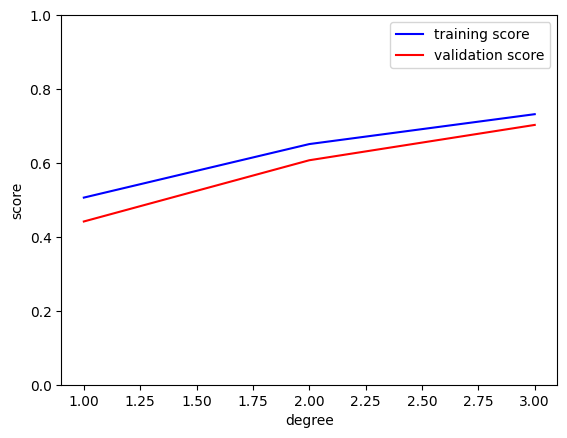

In [54]:
degree = np.arange(1, 4) # veamos para diferentes valores de grados

train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree),LinearRegression()), x, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=5) # cv=7 hace un k-fold CV de 7 folds

plt.plot(degree, np.median(train_score, axis=1), color='blue', 
         label='training score') #graficamos el promedios del parámetro de entrenamietno, y el de validación 

plt.plot(degree, np.median(val_score, axis=1), color='red', 
         label='validation score') #graficamos el promedio de los parámetros de validación o prueba
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

better_degree = degree[np.argmax(np.median(val_score,axis=1))] #buscamos dónde ocurre el máx en la curva
# de la curva de validación

print(f'El mejor orden del polinomio es: {better_degree}')


In [60]:
modelo3=make_pipeline(PolynomialFeatures(degree= 3, interaction_only=False),LinearRegression())
k=5
scores1 = cross_val_score(modelo3, x, y, cv=kf, scoring='neg_root_mean_squared_error')  # Usamos RMSE como métrica
# Realizar k-fold cross-validation
scores = cross_val_score(modelo3, x, y, cv=kf, scoring='r2')  # Usamos R2 como métrica
# Calcular el Error Cuadrático Medio promedio
rmse_promedio = -np.mean(scores1)  # Scikit-learn devuelve los
# valores negativos para RMSE, así que lo invertimos
R2_promedio = np.mean(scores) #promedio de R2
print(f'Root Mean Squared Error promedio (RMSE) Modelo 2: {rmse_promedio}')
print(f'Coef. de Determinación promedio (R^2) Modelo 2:{R2_promedio}')


Root Mean Squared Error promedio (RMSE) Modelo 2: 2.5939762052956232
Coef. de Determinación promedio (R^2) Modelo 2:0.6324741437519356


#### **Punto 4**

In [63]:
modelo3= make_pipeline(PolynomialFeatures(degree= 3, interaction_only=False), LassoCV(alphas=alfa,cv=5,max_iter=10000))
cross_val_score(modelo3, x, y, cv=kf, scoring='neg_root_mean_squared_error')

modelo3.fit(x,y)
coeficientesL= modelo3._final_estimator.coef_
print("Coeficientes Lasso:", coeficientesL)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.327e+02, tolerance: 2.087e-01
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+02, tolerance: 2.087e-01
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check 

Coeficientes Lasso: [ 0.00000000e+00 -4.83090423e-01  1.83995208e+00  0.00000000e+00
 -4.24564321e-01  4.49740756e-01 -1.44208311e+00 -1.89126297e-01
  0.00000000e+00  9.19385765e+00  3.95070257e-02 -3.46674486e-02
  2.36316517e-01 -3.66008190e-03  4.10722287e-02 -1.54154788e+00
  5.17026683e-03 -1.81034879e-02  5.57911089e-02  0.00000000e+00]


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e+02, tolerance: 2.212e-01
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.060e+02, tolerance: 3.012e-01
  model = cd_fast.enet_coordinate_descent(
